In [54]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import FashionMNIST
# import torch.nn as nn
from torch import nn

In [23]:
data = FashionMNIST(root = 'data/', download = True, transform = transforms.Compose([transforms.ToTensor()]))
# dataset = FashionMNIST(root = 'data/', download = True, transform=transforms.Compose([transforms.ToTensor()]))

In [24]:
data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [25]:
dataloader = DataLoader(data, 32, shuffle = True)

In [26]:
dataloader

In [39]:
images, labels = next(iter(data))

In [43]:
data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [42]:
plt.imshow(images[1])

IndexError: index 1 is out of bounds for dimension 0 with size 1

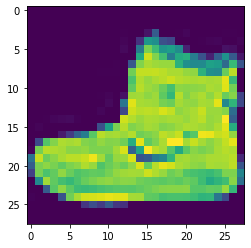

In [31]:
plt.imshow(images[0])

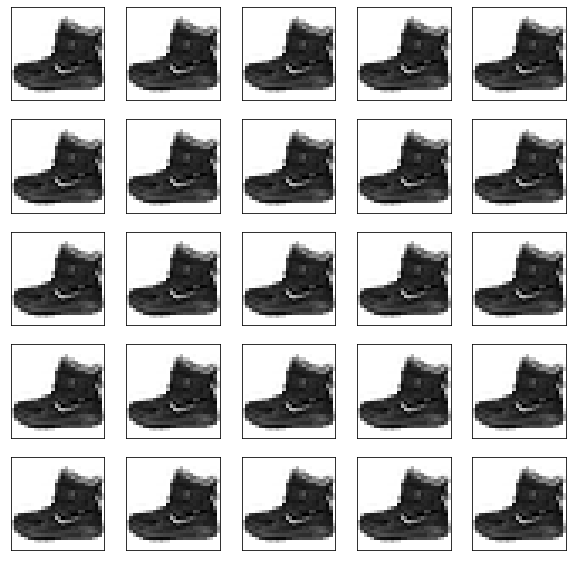

In [45]:
fig = plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[0], cmap = plt.cm.binary)
    
plt.show()

In [67]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [68]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [70]:
X = torch.rand(1,28,28)
logits = model(X)
pred = nn.Softmax(dim = 1)(logits)
y_pred = pred.argmax(1)
print(f"The predicted class {y_pred}")

The predicted class tensor([9])


In [ ]:
loss_fn = 
optim = nn.
